In [1]:
import pandas as pd
import numpy as np
import requests
import html5lib



In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/The_World%27s_Billionaires')
len(dfs)


31

In [3]:
data_2010 = dfs[11]
data_2011 = dfs[10]
data_2012 = dfs[9]
data_2013 = dfs[8]
data_2014 = dfs[7]
data_2015 = dfs[6]
data_2016 = dfs[5]
data_2017 = dfs[4]
data_2018 = dfs[3]
data_2010

,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,1,Carlos Slim & family,$53.5 billion,70,Mexico,"América Móvil, Grupo Carso"
1,2,Bill Gates,$53.0 billion,54,United States,Microsoft
2,3,Warren Buffett,$47.0 billion,79,United States,Berkshire Hathaway
3,4,Mukesh Ambani,$29.0 billion,53,India,Reliance Industries
4,5,Lakshmi Mittal,$28.7 billion,60,India,Arcelor Mittal
5,6,Larry Ellison,$28.0 billion,66,United States,Oracle Corporation
6,7,Bernard Arnault,$27.5 billion,61,France,LVMH Moët Hennessy • Louis Vuitton
7,8,Eike Batista,$27.0 billion,53,Brazil,EBX Group
8,9,Amancio Ortega,$25.0 billion,74,Spain,Inditex Group
9,10,Karl Albrecht,$23.5 billion,90,Germany,Aldi Süd


In [4]:
data = pd.read_csv("data.csv", index_col=0)
data.head(10)

,id,lastName,age,worth 2019 in BUSD,position
0,2813,bezos,54.0,112.0,1.0
1,8910,gates,62.0,90.0,2.0
2,3919,buffett,87.0,84.0,3.0
3,6449,arnault,69.0,72.0,4.0
4,5032,zuckerberg,1985.0,71.0,5.0
5,2009,ortega,82.0,70.0,6.0
6,9178,slim helu,78.0,67.1,7.0
7,5544,koch,82.0,60.0,8.0
8,4633,koch,78.0,60.0,9.0
9,6377,ellison,73.0,58.5,10.0


In [5]:
def delete_columns():
    
    # define valid columns
    valid_columns = ['Name', 'Net worth (USD)']
    # create new df with valid columns
    data_new = data_2010[[x for x in data_2010.columns if x in valid_columns]]
    
    return data_new

data_new = delete_columns()
data_new

,Name,Net worth (USD)
0,Carlos Slim & family,$53.5 billion
1,Bill Gates,$53.0 billion
2,Warren Buffett,$47.0 billion
3,Mukesh Ambani,$29.0 billion
4,Lakshmi Mittal,$28.7 billion
5,Larry Ellison,$28.0 billion
6,Bernard Arnault,$27.5 billion
7,Eike Batista,$27.0 billion
8,Amancio Ortega,$25.0 billion
9,Karl Albrecht,$23.5 billion


In [6]:
def replace_text():
    data_new.loc[:,'Net worth (USD)'] = data_new['Net worth (USD)'].str.replace('billion', '')
    data_new.loc[:,'Net worth (USD)'] = data_new['Net worth (USD)'].str.replace('$', '')
    data_new.loc[:,'Name'] = data_new['Name'].str.replace('& family', '')
    data_new.rename(columns={'Net worth (USD)': 'worth 2010 in BUSD'}, inplace = True)
    
    return data_new
data_new = replace_text()
data_new

/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Name,worth 2010 in BUSD
0,Carlos Slim,53.5
1,Bill Gates,53.0
2,Warren Buffett,47.0
3,Mukesh Ambani,29.0
4,Lakshmi Mittal,28.7
5,Larry Ellison,28.0
6,Bernard Arnault,27.5
7,Eike Batista,27.0
8,Amancio Ortega,25.0
9,Karl Albrecht,23.5


In [7]:

def split_column():
    # new data frame with split value columns 
    new = data_new['Name'].str.split(' ', n = 1, expand = True) 
 
    # making separate last name column from new data frame
    data_new['lastName']= new[1]
    
    # Dropping old Name columns
    data_new.drop(columns =['Name'], inplace = True)
    return data_new
data_new = split_column()
data_new

/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,worth 2010 in BUSD,lastName
0,53.5,Slim
1,53.0,Gates
2,47.0,Buffett
3,29.0,Ambani
4,28.7,Mittal
5,28.0,Ellison
6,27.5,Arnault
7,27.0,Batista
8,25.0,Ortega
9,23.5,Albrecht


In [8]:
def lower_text():
    data_new['lastName'] = data_new['lastName'].apply(lambda x: x.lower())
    return data_new

data_new = lower_text()
data_new


/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,worth 2010 in BUSD,lastName
0,53.5,slim
1,53.0,gates
2,47.0,buffett
3,29.0,ambani
4,28.7,mittal
5,28.0,ellison
6,27.5,arnault
7,27.0,batista
8,25.0,ortega
9,23.5,albrecht


In [9]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
worth 2010 in BUSD    10 non-null object
lastName              10 non-null object
dtypes: object(2)
memory usage: 288.0+ bytes


In [10]:
def change_column_type_2(df):
    data_new['worth 2010 in BUSD'] = data_new['worth 2010 in BUSD'].astype(float)
    return data_new
data_new = change_column_type_2(data_new)
data_new.dtypes

/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


worth 2010 in BUSD    float64
lastName               object
dtype: object

In [16]:
def final_table():
    df_final = pd.merge(data, data_new, on='lastName')
    df_final = df_final.drop_duplicates(subset='lastName', keep='first')
    return df_final
df_final = final_table()
df_final

,id,lastName,age,worth 2019 in BUSD,position,worth 2010 in BUSD
0,8910,gates,62.0,90.0,2.0,53.0
1,3919,buffett,87.0,84.0,3.0,47.0
2,6449,arnault,69.0,72.0,4.0,27.5
3,2009,ortega,82.0,70.0,6.0,25.0
4,6377,ellison,73.0,58.5,10.0,28.0
5,5930,ambani,61.0,40.1,19.0,29.0
7,5336,albrecht,67.0,20.2,48.0,23.5
8,9326,mittal,68.0,18.5,62.0,28.7


In [12]:
# Save first clean table to CSV file
def save_table(df):
    
    df_final.to_csv('df_final.csv')
    return 

# Call function
save_table(df_final)

In [13]:
""""
# To search repete values
data.loc[data.loc[:, 'lastName'] == 'mittal']
""""

,id,lastName,age,worth 2019 in BUSD,position
61,9326,mittal,68.0,18.5,62.0
176,1834,mittal,60.0,8.8,177.0
1254,8480,mittal,87.0,2.0,1255.0


In [28]:
def wealth_difference(df):
    df_final['difference_19_10']= df_final['worth 2019 in BUSD']-df_final['worth 2010 in BUSD']
    return df_final
df_final = wealth_difference(df_final)
df_final

,id,lastName,age,worth 2019 in BUSD,position,worth 2010 in BUSD,difference_19_10,difference_19_10_percent
0,8910,gates,62.0,90.0,2.0,53.0,37.0,0.698113
1,3919,buffett,87.0,84.0,3.0,47.0,37.0,0.787234
2,6449,arnault,69.0,72.0,4.0,27.5,44.5,1.618182
3,2009,ortega,82.0,70.0,6.0,25.0,45.0,1.800000
4,6377,ellison,73.0,58.5,10.0,28.0,30.5,1.089286
5,5930,ambani,61.0,40.1,19.0,29.0,11.1,0.382759
7,5336,albrecht,67.0,20.2,48.0,23.5,-3.3,-0.140426
8,9326,mittal,68.0,18.5,62.0,28.7,-10.2,-0.355401


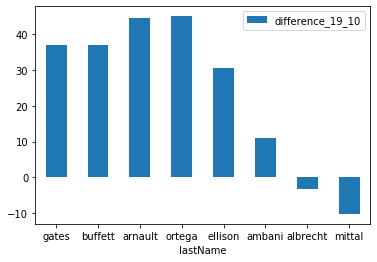

In [41]:
ax = df_final.plot.bar(x='lastName', y='difference_19_10', rot=0)

In [32]:
def wealth_difference_percent(df):
    df_final['difference_19_10_percent']= ((df_final['worth 2019 in BUSD']- \
                                            df_final['worth 2010 in BUSD'])/ \
                                           df_final['worth 2010 in BUSD'])*100
    return df_final
df_final = wealth_difference_percent(df_final)
df_final

,id,lastName,age,worth 2019 in BUSD,position,worth 2010 in BUSD,difference_19_10,difference_19_10_percent
0,8910,gates,62.0,90.0,2.0,53.0,37.0,69.811321
1,3919,buffett,87.0,84.0,3.0,47.0,37.0,78.723404
2,6449,arnault,69.0,72.0,4.0,27.5,44.5,161.818182
3,2009,ortega,82.0,70.0,6.0,25.0,45.0,180.000000
4,6377,ellison,73.0,58.5,10.0,28.0,30.5,108.928571
5,5930,ambani,61.0,40.1,19.0,29.0,11.1,38.275862
7,5336,albrecht,67.0,20.2,48.0,23.5,-3.3,-14.042553
8,9326,mittal,68.0,18.5,62.0,28.7,-10.2,-35.540070


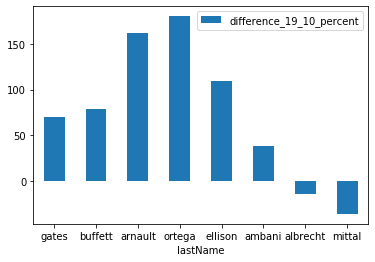

In [42]:
b = df_final.plot.bar(x='lastName', y='difference_19_10_percent', rot=0)